In [46]:
ls

Project-3-YasmeenAlsaedy-FinalFile.ipynb
Project-3-YasmeenAlsaedy-UderandOverandimbalanced.ipynb
Project-3-YasmeenAlsaedy-withBais-andLr.ipynb
Project-3-YasmeenAlsaedy.ipynb
baseline-Copy1.ipynb
project 3 - Maimona.ipynb
project3-Copy1-more details.ipynb
test.csv
train.csv


In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, MissingIndicator

In [48]:
train = pd.read_csv('./train.csv')
train.fillna(value=0,inplace=True)



In [49]:
pd.options.display.max_columns = 90
pd.options.display.max_rows = 1000

In [50]:
numeric_columns =train.describe().columns

In [51]:
train[list(numeric_columns)]

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,109,533352170,60,0.0,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010,109000
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,0,3,2010,138500
5,138,535126040,20,137.0,16492,6,6,1966,2002,0.0,247.0,713.0,557.0,1517.0,1888,0,0,1888,0.0,0.0,2,1,2,1,6,1,1966.0,2.0,578.0,0,0,0,0,0,0,0,6,2010,190000
6,2827,908186070,180,35.0,3675,6,5,2005,2006,82.0,547.0,0.0,0.0,547.0,1072,0,0,1072,1.0,0.0,2,0,2,1,5,0,2005.0,2.0,525.0,0,44,0,0,0,0,0,6,2006,140000
7,145,535154050,20,0.0,12160,5,5,1959,1959,180.0,1000.0,0.0,188.0,1188.0,1188,0,0,1188,1.0,0.0,1,0,3,1,6,0,1959.0,2.0,531.0,0,0,0,0,0,0,0,5,2010,142000
8,1942,535353130,20,0.0,15783,5,5,1952,1952,0.0,292.0,0.0,632.0,924.0,924,0,0,924,0.0,0.0,1,0,2,1,6,0,1952.0,1.0,420.0,0,324,0,0,0,0,400,6,2007,112500
9,1956,535426130,60,70.0,11606,5,5,1969,1969,192.0,650.0,0.0,390.0,1040.0,1040,1040,0,2080,0.0,1.0,1,2,5,1,9,2,1969.0,2.0,504.0,335,0,0,0,0,0,0,9,2007,135000


In [52]:
area_columns = [column for column in list(numeric_columns) if column.find("Area")!=-1 or column.find("SF")!=-1]
area_columns

['Lot Area',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Pool Area']

In [53]:
for area_column in area_columns:
    train[area_column+"_log"] = np.log(train[area_column])

/Users/jasmine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [54]:
train['SalePrice_log']=np.log(train['SalePrice'])

In [55]:
train.head(20)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,...,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Lot Area_log,Mas Vnr Area_log,BsmtFin SF 1_log,BsmtFin SF 2_log,Bsmt Unf SF_log,Total Bsmt SF_log,1st Flr SF_log,2nd Flr SF_log,Low Qual Fin SF_log,Gr Liv Area_log,Garage Area_log,Wood Deck SF_log,Open Porch SF_log,Pool Area_log,SalePrice_log
0,109,533352170,60,RL,0.0,13517,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,...,3,1,Gd,6,Typ,0,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,0,0,0,3,2010,WD,Normal,130500,9.511703,5.666427,6.278521,-inf,5.257495,6.586172,6.586172,6.625392,-inf,7.299121,6.163315,-inf,3.784190,-inf,11.779129
1,544,531379050,60,RL,43.0,11492,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,...,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,0,0,0,4,2009,WD,Normal,220000,9.349406,4.882802,6.456770,-inf,5.620401,6.816736,6.816736,7.097549,-inf,7.660114,6.326149,-inf,4.304065,-inf,12.301383
2,153,535304180,20,RL,68.0,7922,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,...,3,1,Gd,5,Typ,0,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,0,0,0,1,2010,WD,Abnorml,109000,8.977399,-inf,6.594413,-inf,5.786897,6.963190,6.963190,-inf,-inf,6.963190,5.505332,-inf,3.951244,-inf,11.599103
3,318,916386060,60,RL,73.0,9802,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,...,3,1,TA,7,Typ,0,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,0,0,0,4,2010,WD,Normal,174000,9.190342,-inf,-inf,-inf,5.950643,5.950643,6.612041,6.551080,-inf,7.275172,5.991465,4.605170,-inf,-inf,12.066811
4,255,906425045,50,RL,82.0,14235,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,...,3,1,TA,6,Typ,0,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,0,0,0,3,2010,WD,Normal,138500,9.563459,-inf,-inf,-inf,6.516193,6.516193,6.722630,6.419995,-inf,7.275865,6.182085,-inf,4.077537,-inf,11.838626
5,138,535126040,20,RL,137.0,16492,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,247.0,Rec,713.0,557.0,1517.0,GasA,Ex,Y,SBrkr,1888,...,2,1,Gd,6,Mod,1,Gd,Attchd,1966.0,Fin,2.0,578.0,TA,TA,Y,0,0,0,0,0,0,0,0,0,0,6,2010,WD,Normal,190000,9.710631,-inf,5.509388,6.569481,6.322565,7.324490,7.543273,-inf,-inf,7.543273,6.359574,-inf,-inf,-inf,12.154779
6,2827,908186070,180,RM,35.0,3675,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SFoyer,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,82.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547.0,Unf,0.0,0.0,547.0,GasA,Gd,Y,SBrkr,1072,...,2,1,TA,5,Typ,0,0,Basment,2005.0

In [56]:
train[[log_column for log_column in train.columns if log_column.find('log')!=-1]]=train[[log_column for log_column in train.columns if log_column.find('log')!=-1]].clip_lower(0)


In [57]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,...,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Lot Area_log,Mas Vnr Area_log,BsmtFin SF 1_log,BsmtFin SF 2_log,Bsmt Unf SF_log,Total Bsmt SF_log,1st Flr SF_log,2nd Flr SF_log,Low Qual Fin SF_log,Gr Liv Area_log,Garage Area_log,Wood Deck SF_log,Open Porch SF_log,Pool Area_log,SalePrice_log
0,109,533352170,60,RL,0.0,13517,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,...,3,1,Gd,6,Typ,0,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,0,0,0,3,2010,WD,Normal,130500,9.511703,5.666427,6.278521,0.0,5.257495,6.586172,6.586172,6.625392,0.0,7.299121,6.163315,0.00000,3.784190,0.0,11.779129
1,544,531379050,60,RL,43.0,11492,Pave,0,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,...,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,0,0,0,4,2009,WD,Normal,220000,9.349406,4.882802,6.456770,0.0,5.620401,6.816736,6.816736,7.097549,0.0,7.660114,6.326149,0.00000,4.304065,0.0,12.301383
2,153,535304180,20,RL,68.0,7922,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,...,3,1,Gd,5,Typ,0,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,0,0,0,1,2010,WD,Abnorml,109000,8.977399,0.000000,6.594413,0.0,5.786897,6.963190,6.963190,0.000000,0.0,6.963190,5.505332,0.00000,3.951244,0.0,11.599103
3,318,916386060,60,RL,73.0,9802,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,...,3,1,TA,7,Typ,0,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,0,0,0,4,2010,WD,Normal,174000,9.190342,0.000000,0.000000,0.0,5.950643,5.950643,6.612041,6.551080,0.0,7.275172,5.991465,4.60517,0.000000,0.0,12.066811
4,255,906425045,50,RL,82.0,14235,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,...,3,1,TA,6,Typ,0,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,0,0,0,3,2010,WD,Normal,138500,9.563459,0.000000,0.000000,0.0,6.516193,6.516193,6.722630,6.419995,0.0,7.275865,6.182085,0.00000,4.077537,0.0,11.838626


In [58]:
train.head()
EncodedSaleConditionDictionary = {'Abnorml': 1, 'Normal': 0, 'Partial': 0, 'Family' : 0, 'Alloca' : 0, 'AdjLand' : 0}
train['Sale Condition'] = train['Sale Condition'].map(EncodedSaleConditionDictionary)


#sale_condition = train.pop('Sale Condition')

In [59]:
train =pd.get_dummies(train,drop_first=True)

In [60]:
train.dtypes

Id                        int64
PID                       int64
MS SubClass               int64
Lot Frontage            float64
Lot Area                  int64
Overall Qual              int64
Overall Cond              int64
Year Built                int64
Year Remod/Add            int64
Mas Vnr Area            float64
BsmtFin SF 1            float64
BsmtFin SF 2            float64
Bsmt Unf SF             float64
Total Bsmt SF           float64
1st Flr SF                int64
2nd Flr SF                int64
Low Qual Fin SF           int64
Gr Liv Area               int64
Bsmt Full Bath          float64
Bsmt Half Bath          float64
Full Bath                 int64
Half Bath                 int64
Bedroom AbvGr             int64
Kitchen AbvGr             int64
TotRms AbvGrd             int64
Fireplaces                int64
Garage Yr Blt           float64
Garage Cars             float64
Garage Area             float64
Wood Deck SF              int64
Open Porch SF             int64
Enclosed

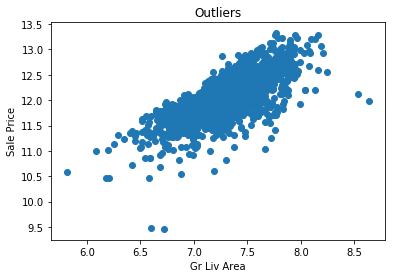

In [61]:
plt.scatter(np.log(train['Gr Liv Area']),np.log( train.SalePrice))
plt.title("Outliers")
plt.xlabel("Gr Liv Area")
plt.ylabel("Sale Price")
plt.show()


In [62]:
train[train["Gr Liv Area"]>3800]

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Condition,SalePrice,Lot Area_log,Mas Vnr Area_log,BsmtFin SF 1_log,BsmtFin SF 2_log,Bsmt Unf SF_log,...,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_Fin,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Ex,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Pool QC_Ex,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
616,1498,908154080,20,123.0,47007,5,7,1959,1996,0.0,0.0,0.0,0.0,0.0,3820,0,0,3820,0.0,0.0,3,1,5,1,11,2,1959.0,2.0,624.0,0,372,0,0,0,0,0,7,2008,0,284700,10.758052,0.000000,0.000000,0.0,0.000000,...,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
960,1499,908154235,60,313.0,63887,10,5,2008,2008,796.0,5644.0,0.0,466.0,6110.0,4692,950,0,5642,2.0,0.0,2,1,3,1,12,3,2008.0,2.0,1418.0,214,292,0,0,0,480,0,1,2008,0,160000,11.064871,6.679599,8.638348,0.0,6.144186,...,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1885,2181,908154195,20,128.0,39290,10,5,2008,2009,1224.0,4010.0,0.0,1085.0,5095.0,5095,0,0,5095,1.0,1.0,2,1,2,1,15,2,2008.0,3.0,1154.0,546,484,0,0,0,0,17000,10,2007,0,183850,10.578725,7.109879,8.296547,0.0,6.989335,...,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [63]:
train = train.drop(train[train["Gr Liv Area"]>3800].index)

In [64]:
train[train["Total Bsmt SF"]>3205]

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Condition,SalePrice,Lot Area_log,Mas Vnr Area_log,BsmtFin SF 1_log,BsmtFin SF 2_log,Bsmt Unf SF_log,...,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_Fin,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Ex,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Pool QC_Ex,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
1147,445,528142130,20,85.0,10655,8,5,2003,2004,296.0,1124.0,479.0,1603.0,3206.0,1629,0,0,1629,1.0,0.0,2,0,3,1,7,1,2003.0,3.0,880.0,0,0,0,0,0,0,0,10,2009,0,284000,9.273785,5.690359,7.024649,6.171701,7.379632,...,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [65]:
train = train.drop(train[train["Total Bsmt SF"]>3205].index)

In [66]:
train[train["Gr Liv Area"]>3800]

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Condition,SalePrice,Lot Area_log,Mas Vnr Area_log,BsmtFin SF 1_log,BsmtFin SF 2_log,Bsmt Unf SF_log,...,Fireplace Qu_Gd,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_Fin,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Ex,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Ex,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Pool QC_Ex,Pool QC_Fa,Pool QC_Gd,Pool QC_TA,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Misc Feature_Elev,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD


In [67]:
corr = train.corr().abs()
corr.sort_values(["SalePrice_log"], ascending = False, inplace = True)
#print(corr.SalePrice.abs())
x= list(corr.SalePrice.items())
x[1:25]
#columns= [column[0] for column in x[0:30]]
columns= [column[0] for column in x]
columns, x[2:]

(['SalePrice_log',
  'SalePrice',
  'Overall Qual',
  'Gr Liv Area_log',
  'Gr Liv Area',
  'Garage Cars',
  'Total Bsmt SF',
  'Garage Area',
  '1st Flr SF',
  'Year Built',
  '1st Flr SF_log',
  'Year Remod/Add',
  'Exter Qual_TA',
  'Full Bath',
  'Foundation_PConc',
  'Kitchen Qual_TA',
  'TotRms AbvGrd',
  'Exter Qual_Gd',
  'Bsmt Qual_Ex',
  'Fireplaces',
  'Open Porch SF_log',
  'BsmtFin Type 1_GLQ',
  'Bsmt Qual_TA',
  'Mas Vnr Area',
  'Mas Vnr Area_log',
  'Garage Finish_Unf',
  'Garage Area_log',
  'Mas Vnr Type_None',
  'BsmtFin SF 1',
  'Garage Type_Attchd',
  'Garage Finish_Fin',
  'Garage Type_Detchd',
  'Total Bsmt SF_log',
  'Central Air_Y',
  'Paved Drive_Y',
  'Kitchen Qual_Gd',
  'Neighborhood_NridgHt',
  'Garage Cond_TA',
  'Exterior 1st_VinylSd',
  'Fireplace Qu_Gd',
  'Lot Area_log',
  'Heating QC_TA',
  'Exterior 2nd_VinylSd',
  'Wood Deck SF_log',
  'Garage Qual_TA',
  'Wood Deck SF',
  'Open Porch SF',
  'Foundation_CBlock',
  'MS Zoning_RM',
  'Bsmt Exposure_

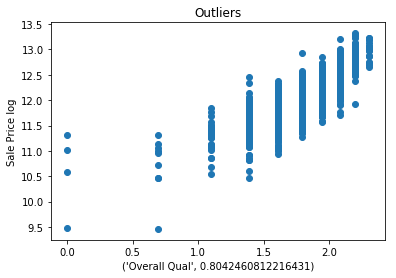

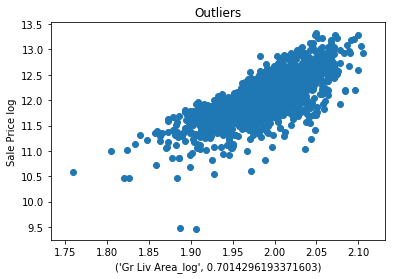

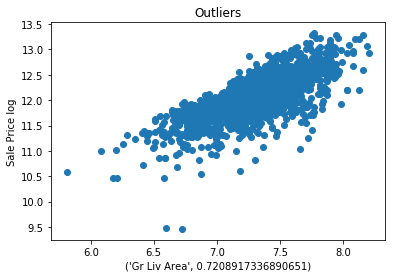

/Users/jasmine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


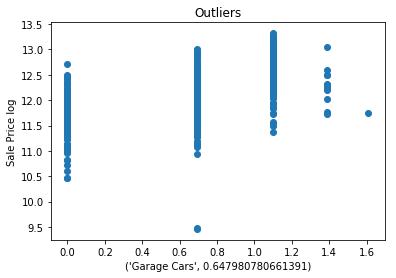

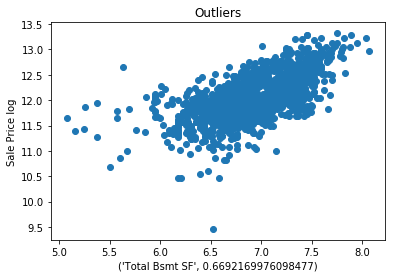

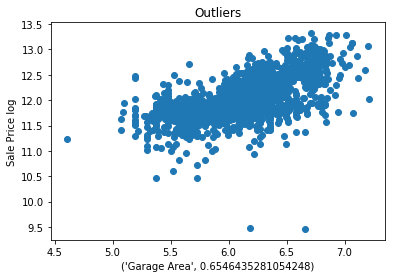

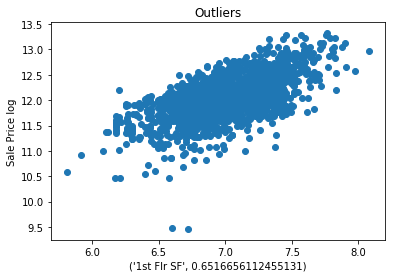

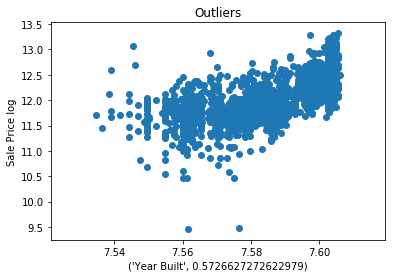

In [68]:
for column in x[2:10]:
    plt.scatter(np.log(train[column[0]]), np.log(train.SalePrice))
    plt.title("Outliers")
    plt.xlabel(column)
    plt.ylabel("Sale Price log")
    plt.show()

In [69]:
#X = SalePrice = 7851 + 1.72 Lot Area + 41.2 Total Bsmt SF + 40.8 Gr Liv Area
#            + 20952 Garage Cars + 8379 FireYN
data = train[columns]

In [70]:
data.head()

,SalePrice_log,SalePrice,Overall Qual,Gr Liv Area_log,Gr Liv Area,Garage Cars,Total Bsmt SF,Garage Area,1st Flr SF,Year Built,1st Flr SF_log,Year Remod/Add,Exter Qual_TA,Full Bath,Foundation_PConc,Kitchen Qual_TA,TotRms AbvGrd,Exter Qual_Gd,Bsmt Qual_Ex,Fireplaces,Open Porch SF_log,BsmtFin Type 1_GLQ,Bsmt Qual_TA,Mas Vnr Area,Mas Vnr Area_log,Garage Finish_Unf,Garage Area_log,Mas Vnr Type_None,BsmtFin SF 1,Garage Type_Attchd,Garage Finish_Fin,Garage Type_Detchd,Total Bsmt SF_log,Central Air_Y,Paved Drive_Y,Kitchen Qual_Gd,Neighborhood_NridgHt,Garage Cond_TA,Exterior 1st_VinylSd,Fireplace Qu_Gd,Lot Area_log,Heating QC_TA,Exterior 2nd_VinylSd,Wood Deck SF_log,Garage Qual_TA,...,BsmtFin Type 2_LwQ,Exterior 1st_ImStucc,Garage Cond_Ex,Misc Feature_TenC,Heating_OthW,Neighborhood_Blueste,Yr Sold,Roof Matl_Membran,Garage Type_2Types,Misc Feature_Othr,BsmtFin SF 2_log,Pool QC_Fa,Roof Style_Shed,Misc Feature_Gar2,Lot Shape_IR3,Roof Matl_Tar&Grv,Land Contour_Low,Condition 1_RRNn,Garage Qual_Ex,House Style_SLvl,Pool QC_TA,BsmtFin Type 2_ALQ,Condition 2_Norm,Sale Type_CWD,House Style_2.5Unf,Exterior 1st_Plywood,Neighborhood_Greens,Neighborhood_Mitchel,Lot Config_FR3,Condition 2_RRAn,Neighborhood_Landmrk,Utilities_NoSeWa,Sale Type_ConLI,Bsmt Cond_Ex,Land Slope_Sev,Exterior 2nd_BrkFace,Condition 2_RRAe,Condition 1_RRAn,Fence_GdPrv,Misc Val,Alley_Pave,Foundation_Wood,Lot Config_FR2,Fireplace Qu_Fa,Misc Feature_Elev
0,11.779129,130500,6,7.299121,1479,2.0,725.0,475.0,725,1976,6.586172,2005,0,2,0,0,6,1,0,0,3.784190,1,1,289.0,5.666427,0,6.163315,0,533.0,1,0,0,6.586172,1,1,1,0,1,0,0,9.511703,0,0,0.00000,1,...,0,0,0,0,0,0,2010,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12.301383,220000,7,7.660114,2122,2.0,913.0,559.0,913,1996,6.816736,1997,0,2,1,0,8,1,0,1,4.304065,1,0,132.0,4.882802,0,6.326149,0,637.0,1,0,0,6.816736,1,1,1,0,1,1,0,9.349406,0,1,0.00000,1,...,0,0,0,0,0,0,2009,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,11.599103,109000,5,6.963190,1057,1.0,1057.0,246.0,1057,1953,6.963190,2007,1,1,0,0,5,0,0,0,3.951244,1,1,0.0,0.000000,1,5.505332,1,731.0,0,0,1,6.963190,1,1,1,0,1,1,0,8.977399,1,1,0.00000,1,...,0,0,0,0,0,0,2010,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,12.066811,174000,5,7.275172,1444,2.0,384.0,400.0,744,2006,6.612041,2007,1,2,1,1,7,0,0,0,0.000000,0,0,0.0,0.000000,0,5.991465,1,0.0,0,1,0,5.950643,1,1,0,0,1,1,0,9.190342,0,1,4.60517,1,...,0,0,0,0,0,0,2010,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,11.838626,138500,6,7.275865,1445,2.0,676.0,484.0,831,1900,6.722630,1993,1,2,1,1,6,0,0,0,4.077537,0,0,0.0,0.000000,1,6.182085,1,0.0,0,0,1,6.516193,1,0,0,0,1,0,0,9.563459,1,0,0.00000,1,...,0,0,0,0,0,0,2010,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [71]:
#data = data.drop(data[data.isnull().any(axis=1)].index)

In [72]:
data[data.isnull().any(axis=1)]

,SalePrice_log,SalePrice,Overall Qual,Gr Liv Area_log,Gr Liv Area,Garage Cars,Total Bsmt SF,Garage Area,1st Flr SF,Year Built,1st Flr SF_log,Year Remod/Add,Exter Qual_TA,Full Bath,Foundation_PConc,Kitchen Qual_TA,TotRms AbvGrd,Exter Qual_Gd,Bsmt Qual_Ex,Fireplaces,Open Porch SF_log,BsmtFin Type 1_GLQ,Bsmt Qual_TA,Mas Vnr Area,Mas Vnr Area_log,Garage Finish_Unf,Garage Area_log,Mas Vnr Type_None,BsmtFin SF 1,Garage Type_Attchd,Garage Finish_Fin,Garage Type_Detchd,Total Bsmt SF_log,Central Air_Y,Paved Drive_Y,Kitchen Qual_Gd,Neighborhood_NridgHt,Garage Cond_TA,Exterior 1st_VinylSd,Fireplace Qu_Gd,Lot Area_log,Heating QC_TA,Exterior 2nd_VinylSd,Wood Deck SF_log,Garage Qual_TA,...,BsmtFin Type 2_LwQ,Exterior 1st_ImStucc,Garage Cond_Ex,Misc Feature_TenC,Heating_OthW,Neighborhood_Blueste,Yr Sold,Roof Matl_Membran,Garage Type_2Types,Misc Feature_Othr,BsmtFin SF 2_log,Pool QC_Fa,Roof Style_Shed,Misc Feature_Gar2,Lot Shape_IR3,Roof Matl_Tar&Grv,Land Contour_Low,Condition 1_RRNn,Garage Qual_Ex,House Style_SLvl,Pool QC_TA,BsmtFin Type 2_ALQ,Condition 2_Norm,Sale Type_CWD,House Style_2.5Unf,Exterior 1st_Plywood,Neighborhood_Greens,Neighborhood_Mitchel,Lot Config_FR3,Condition 2_RRAn,Neighborhood_Landmrk,Utilities_NoSeWa,Sale Type_ConLI,Bsmt Cond_Ex,Land Slope_Sev,Exterior 2nd_BrkFace,Condition 2_RRAe,Condition 1_RRAn,Fence_GdPrv,Misc Val,Alley_Pave,Foundation_Wood,Lot Config_FR2,Fireplace Qu_Fa,Misc Feature_Elev


In [73]:
data.head()

,SalePrice_log,SalePrice,Overall Qual,Gr Liv Area_log,Gr Liv Area,Garage Cars,Total Bsmt SF,Garage Area,1st Flr SF,Year Built,1st Flr SF_log,Year Remod/Add,Exter Qual_TA,Full Bath,Foundation_PConc,Kitchen Qual_TA,TotRms AbvGrd,Exter Qual_Gd,Bsmt Qual_Ex,Fireplaces,Open Porch SF_log,BsmtFin Type 1_GLQ,Bsmt Qual_TA,Mas Vnr Area,Mas Vnr Area_log,Garage Finish_Unf,Garage Area_log,Mas Vnr Type_None,BsmtFin SF 1,Garage Type_Attchd,Garage Finish_Fin,Garage Type_Detchd,Total Bsmt SF_log,Central Air_Y,Paved Drive_Y,Kitchen Qual_Gd,Neighborhood_NridgHt,Garage Cond_TA,Exterior 1st_VinylSd,Fireplace Qu_Gd,Lot Area_log,Heating QC_TA,Exterior 2nd_VinylSd,Wood Deck SF_log,Garage Qual_TA,...,BsmtFin Type 2_LwQ,Exterior 1st_ImStucc,Garage Cond_Ex,Misc Feature_TenC,Heating_OthW,Neighborhood_Blueste,Yr Sold,Roof Matl_Membran,Garage Type_2Types,Misc Feature_Othr,BsmtFin SF 2_log,Pool QC_Fa,Roof Style_Shed,Misc Feature_Gar2,Lot Shape_IR3,Roof Matl_Tar&Grv,Land Contour_Low,Condition 1_RRNn,Garage Qual_Ex,House Style_SLvl,Pool QC_TA,BsmtFin Type 2_ALQ,Condition 2_Norm,Sale Type_CWD,House Style_2.5Unf,Exterior 1st_Plywood,Neighborhood_Greens,Neighborhood_Mitchel,Lot Config_FR3,Condition 2_RRAn,Neighborhood_Landmrk,Utilities_NoSeWa,Sale Type_ConLI,Bsmt Cond_Ex,Land Slope_Sev,Exterior 2nd_BrkFace,Condition 2_RRAe,Condition 1_RRAn,Fence_GdPrv,Misc Val,Alley_Pave,Foundation_Wood,Lot Config_FR2,Fireplace Qu_Fa,Misc Feature_Elev
0,11.779129,130500,6,7.299121,1479,2.0,725.0,475.0,725,1976,6.586172,2005,0,2,0,0,6,1,0,0,3.784190,1,1,289.0,5.666427,0,6.163315,0,533.0,1,0,0,6.586172,1,1,1,0,1,0,0,9.511703,0,0,0.00000,1,...,0,0,0,0,0,0,2010,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12.301383,220000,7,7.660114,2122,2.0,913.0,559.0,913,1996,6.816736,1997,0,2,1,0,8,1,0,1,4.304065,1,0,132.0,4.882802,0,6.326149,0,637.0,1,0,0,6.816736,1,1,1,0,1,1,0,9.349406,0,1,0.00000,1,...,0,0,0,0,0,0,2009,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,11.599103,109000,5,6.963190,1057,1.0,1057.0,246.0,1057,1953,6.963190,2007,1,1,0,0,5,0,0,0,3.951244,1,1,0.0,0.000000,1,5.505332,1,731.0,0,0,1,6.963190,1,1,1,0,1,1,0,8.977399,1,1,0.00000,1,...,0,0,0,0,0,0,2010,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,12.066811,174000,5,7.275172,1444,2.0,384.0,400.0,744,2006,6.612041,2007,1,2,1,1,7,0,0,0,0.000000,0,0,0.0,0.000000,0,5.991465,1,0.0,0,1,0,5.950643,1,1,0,0,1,1,0,9.190342,0,1,4.60517,1,...,0,0,0,0,0,0,2010,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,11.838626,138500,6,7.275865,1445,2.0,676.0,484.0,831,1900,6.722630,1993,1,2,1,1,6,0,0,0,4.077537,0,0,0.0,0.000000,1,6.182085,1,0.0,0,0,1,6.516193,1,0,0,0,1,0,0,9.563459,1,0,0.00000,1,...,0,0,0,0,0,0,2010,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
X = data[[column for column in columns if column  != 'SalePrice' and column !='Sale Condition' and column  != 'SalePrice_log']]
y = data.SalePrice_log
X.head()

,Overall Qual,Gr Liv Area_log,Gr Liv Area,Garage Cars,Total Bsmt SF,Garage Area,1st Flr SF,Year Built,1st Flr SF_log,Year Remod/Add,Exter Qual_TA,Full Bath,Foundation_PConc,Kitchen Qual_TA,TotRms AbvGrd,Exter Qual_Gd,Bsmt Qual_Ex,Fireplaces,Open Porch SF_log,BsmtFin Type 1_GLQ,Bsmt Qual_TA,Mas Vnr Area,Mas Vnr Area_log,Garage Finish_Unf,Garage Area_log,Mas Vnr Type_None,BsmtFin SF 1,Garage Type_Attchd,Garage Finish_Fin,Garage Type_Detchd,Total Bsmt SF_log,Central Air_Y,Paved Drive_Y,Kitchen Qual_Gd,Neighborhood_NridgHt,Garage Cond_TA,Exterior 1st_VinylSd,Fireplace Qu_Gd,Lot Area_log,Heating QC_TA,Exterior 2nd_VinylSd,Wood Deck SF_log,Garage Qual_TA,Wood Deck SF,Open Porch SF,...,BsmtFin Type 2_LwQ,Exterior 1st_ImStucc,Garage Cond_Ex,Misc Feature_TenC,Heating_OthW,Neighborhood_Blueste,Yr Sold,Roof Matl_Membran,Garage Type_2Types,Misc Feature_Othr,BsmtFin SF 2_log,Pool QC_Fa,Roof Style_Shed,Misc Feature_Gar2,Lot Shape_IR3,Roof Matl_Tar&Grv,Land Contour_Low,Condition 1_RRNn,Garage Qual_Ex,House Style_SLvl,Pool QC_TA,BsmtFin Type 2_ALQ,Condition 2_Norm,Sale Type_CWD,House Style_2.5Unf,Exterior 1st_Plywood,Neighborhood_Greens,Neighborhood_Mitchel,Lot Config_FR3,Condition 2_RRAn,Neighborhood_Landmrk,Utilities_NoSeWa,Sale Type_ConLI,Bsmt Cond_Ex,Land Slope_Sev,Exterior 2nd_BrkFace,Condition 2_RRAe,Condition 1_RRAn,Fence_GdPrv,Misc Val,Alley_Pave,Foundation_Wood,Lot Config_FR2,Fireplace Qu_Fa,Misc Feature_Elev
0,6,7.299121,1479,2.0,725.0,475.0,725,1976,6.586172,2005,0,2,0,0,6,1,0,0,3.784190,1,1,289.0,5.666427,0,6.163315,0,533.0,1,0,0,6.586172,1,1,1,0,1,0,0,9.511703,0,0,0.00000,1,0,44,...,0,0,0,0,0,0,2010,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,7.660114,2122,2.0,913.0,559.0,913,1996,6.816736,1997,0,2,1,0,8,1,0,1,4.304065,1,0,132.0,4.882802,0,6.326149,0,637.0,1,0,0,6.816736,1,1,1,0,1,1,0,9.349406,0,1,0.00000,1,0,74,...,0,0,0,0,0,0,2009,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,6.963190,1057,1.0,1057.0,246.0,1057,1953,6.963190,2007,1,1,0,0,5,0,0,0,3.951244,1,1,0.0,0.000000,1,5.505332,1,731.0,0,0,1,6.963190,1,1,1,0,1,1,0,8.977399,1,1,0.00000,1,0,52,...,0,0,0,0,0,0,2010,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,7.275172,1444,2.0,384.0,400.0,744,2006,6.612041,2007,1,2,1,1,7,0,0,0,0.000000,0,0,0.0,0.000000,0,5.991465,1,0.0,0,1,0,5.950643,1,1,0,0,1,1,0,9.190342,0,1,4.60517,1,100,0,...,0,0,0,0,0,0,2010,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,7.275865,1445,2.0,676.0,484.0,831,1900,6.722630,1993,1,2,1,1,6,0,0,0,4.077537,0,0,0.0,0.000000,1,6.182085,1,0.0,0,0,1,6.516193,1,0,0,0,1,0,0,9.563459,1,0,0.00000,1,0,59,...,0,0,0,0,0,0,2010,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [76]:
lr1 = LinearRegression()
lr1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [77]:
X.describe()

,Overall Qual,Gr Liv Area_log,Gr Liv Area,Garage Cars,Total Bsmt SF,Garage Area,1st Flr SF,Year Built,1st Flr SF_log,Year Remod/Add,Exter Qual_TA,Full Bath,Foundation_PConc,Kitchen Qual_TA,TotRms AbvGrd,Exter Qual_Gd,Bsmt Qual_Ex,Fireplaces,Open Porch SF_log,BsmtFin Type 1_GLQ,Bsmt Qual_TA,Mas Vnr Area,Mas Vnr Area_log,Garage Finish_Unf,Garage Area_log,Mas Vnr Type_None,BsmtFin SF 1,Garage Type_Attchd,Garage Finish_Fin,Garage Type_Detchd,Total Bsmt SF_log,Central Air_Y,Paved Drive_Y,Kitchen Qual_Gd,Neighborhood_NridgHt,Garage Cond_TA,Exterior 1st_VinylSd,Fireplace Qu_Gd,Lot Area_log,Heating QC_TA,Exterior 2nd_VinylSd,Wood Deck SF_log,Garage Qual_TA,Wood Deck SF,Open Porch SF,...,BsmtFin Type 2_LwQ,Exterior 1st_ImStucc,Garage Cond_Ex,Misc Feature_TenC,Heating_OthW,Neighborhood_Blueste,Yr Sold,Roof Matl_Membran,Garage Type_2Types,Misc Feature_Othr,BsmtFin SF 2_log,Pool QC_Fa,Roof Style_Shed,Misc Feature_Gar2,Lot Shape_IR3,Roof Matl_Tar&Grv,Land Contour_Low,Condition 1_RRNn,Garage Qual_Ex,House Style_SLvl,Pool QC_TA,BsmtFin Type 2_ALQ,Condition 2_Norm,Sale Type_CWD,House Style_2.5Unf,Exterior 1st_Plywood,Neighborhood_Greens,Neighborhood_Mitchel,Lot Config_FR3,Condition 2_RRAn,Neighborhood_Landmrk,Utilities_NoSeWa,Sale Type_ConLI,Bsmt Cond_Ex,Land Slope_Sev,Exterior 2nd_BrkFace,Condition 2_RRAe,Condition 1_RRAn,Fence_GdPrv,Misc Val,Alley_Pave,Foundation_Wood,Lot Config_FR2,Fireplace Qu_Fa,Misc Feature_Elev
count,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.00000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.00000,2047.00000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,...,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000,2047.0
mean,6.107963,7.259041,1494.352711,1.774304,1052.498290,472.374695,1159.320469,1971.664387,7.004857,1984.150953,0.608696,1.575965,0.450904,0.51148,6.426478,0.340010,0.088911,0.588178,2.320757,0.298974,0.433317,97.687836,2.054647,0.414265,5.802397,0.594529,437.683439,0.59062,0.24768,0.261847,6.736305,0.931119,0.907181,0.393258,0.059111,0.910601,0.353200,0.253542,9.090094,0.291158,0.351734,2.434963,0.893014,93.645823,47.088911,...,0.029311,0.000489,0.000977,0.000489,0.000977,0.002931,2007.775281,0.000489,0.009282,0.001466,0.679701,0.000977,0.001466,0.001954,0.003908,0.007328,0.021006,0.002931,0.001466,0.045921,0.000977,0.017098,0.987298,0.004885,0.006839,0.073766,0.001466,0.040059,0.004397,0.000489,0.000489,0.000489,0.003420,0.001466,0.004885,0.016610,0.000489,0.017587,0.040547,43.370298,0.026869,0.000977,0.029311,0.028823,0.0
std,1.421649,0.318652,483.286074,0.765114,423.722595,214.593259,374.521129,30.176788,0.320019,21.036861,0.488162,0.548675,0.497705,0.49999,1.541965,0.473828,0.284684,0.635321,2.146564,0.457920,0.495655,171.950980,2.601446,0.492715,1.457644,0.491103,439.689491,0.49184,0.43177,0.439747,1.169261,0.253314,0.290249,0.488593,0.235890,0.285389,0.478081,0.435145,0.497268,0.454407,0.477628,2.590427,0.309171,128.224922,65.489136,...,0.168719,0.022102,0.031250,0.022102,0.031250,0.054074,1.312886,0.022102,0.095918,0.038264,1.865987,0.031250,0.038264,0.044173,0.062408,0.085309,0.143440,0.054074,0.038264,0.209365,0.031250,0.129669,0.112010,0.069740,0.082437,0.2

In [78]:
lr1.score(X_test,y_test)

0.7859578405576021

In [79]:
X_train.shape

(1535, 278)

In [80]:
lr1.coef_

array([ 4.15832366e-02,  3.47385847e-01, -1.52942968e-05,  2.21681929e-02,
        1.47823017e-04,  2.25012067e-04, -1.36299353e-04,  2.10502607e-03,
        2.24939047e-01,  5.34476297e-04, -4.05016837e-02,  1.54834267e-02,
        4.22165384e-02, -5.58536285e-02,  6.22172497e-03, -2.74734217e-02,
        1.05203501e-01,  1.97566258e-02,  4.96824033e-03,  9.55458213e-02,
        9.08788461e-02,  4.10350811e-05,  1.08153054e-03,  1.12763890e-01,
       -9.52387383e-02, -1.92536352e-02,  5.22945387e-05,  3.44873795e-02,
        1.05888710e-01,  3.50022231e-02, -6.45417163e-02,  3.96333733e-03,
        4.95287961e-02, -6.00760090e-02, -1.54638422e-02,  7.60665753e-02,
        2.78051507e-02, -9.93500089e-04,  9.94370056e-02, -1.89013151e-02,
        7.67723434e-03,  1.30555263e-03,  1.14700580e-01,  6.20826809e-05,
       -6.37475144e-05,  1.66024092e-02,  6.55107486e-01,  6.86370004e-03,
        6.95253827e-05,  5.33017115e-03,  8.38999698e-02,  6.35209684e-02,
        7.58123939e-03, -

In [81]:
Cs = np.logspace(-10,3,14)
Cs
from sklearn.metrics import mean_squared_error
from math import sqrt

In [82]:

l1_log_reg = LassoCV(alphas = Cs,cv=5)
l1_log_reg.fit(X_train,y_train)

/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective di

/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective di

LassoCV(alphas=array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [83]:
l1_log_reg.score(X_train,y_train),l1_log_reg.score(X_test,y_test)

(0.9271446409891222, 0.8962955658888397)

In [84]:
def get_rmse(y_actual, y_predicted):
    return sqrt(mean_squared_error(y_actual, y_predicted))

In [85]:
get_rmse(np.exp(l1_log_reg.predict(X_train)),np.exp(y_train)),get_rmse(np.exp(l1_log_reg.predict(X_test)),np.exp(y_test))

(19083.775984967368, 20226.25127617729)

In [86]:
l1_log_reg.alpha_

0.001

In [87]:
l2_log_reg = RidgeCV(alphas = Cs,cv=5)
l2_log_reg.fit(X_train,y_train)

/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.766061e-30
  overwrite_a=True).T
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.065156e-27
  overwrite_a=True).T
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.535690e-27
  overwrite_a=True).T
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.2

/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.254524e-20
  overwrite_a=True).T
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.082527e-20
  overwrite_a=True).T
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.263685e-20
  overwrite_a=True).T
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.1

RidgeCV(alphas=array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
    cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [88]:
l2_log_reg.score(X_train,y_train),l2_log_reg.score(X_test,y_test)

(0.9547907439694019, 0.8991680287454552)

In [89]:
get_rmse(np.exp(l2_log_reg.predict(X_train)),np.exp(y_train)),get_rmse(np.exp(l2_log_reg.predict(X_test)),np.exp(y_test))

(15845.04743018887, 19298.025489004787)

In [90]:
l1_log_reg.coef_

array([ 6.93202102e-02,  4.16835096e-02,  3.11812579e-04,  0.00000000e+00,
        1.77515846e-04,  9.16994644e-05, -7.46236173e-05,  2.44287500e-03,
        2.19977970e-02,  1.11689897e-03, -0.00000000e+00,  1.46867698e-04,
        2.93069160e-02, -0.00000000e+00,  6.96503483e-03,  0.00000000e+00,
        3.16870336e-02,  2.57228164e-02,  3.90143928e-03,  0.00000000e+00,
       -0.00000000e+00,  4.21437090e-05, -1.46107287e-03, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -2.98546957e-05, -0.00000000e+00,
        1.06008620e-03,  0.00000000e+00,  0.00000000e+00,  2.38469565e-02,
        4.45550224e-02, -0.00000000e+00,  1.67620575e-02,  3.41107823e-03,
        0.00000000e+00,  5.35540907e-03,  6.91028361e-02, -1.22622105e-02,
       -0.00000000e+00,  1.59676613e-03,  0.00000000e+00,  5.67117285e-05,
       -3.11225680e-05, -0.00000000e+00, -0.00000000e+00,  3.14689007e-02,
        1.78405564e-05, -0.00000000e+00, -0.00000000e+00,  3.70926374e-02,
        4.67420733e-03, -

In [91]:
lr1.coef_

array([ 4.15832366e-02,  3.47385847e-01, -1.52942968e-05,  2.21681929e-02,
        1.47823017e-04,  2.25012067e-04, -1.36299353e-04,  2.10502607e-03,
        2.24939047e-01,  5.34476297e-04, -4.05016837e-02,  1.54834267e-02,
        4.22165384e-02, -5.58536285e-02,  6.22172497e-03, -2.74734217e-02,
        1.05203501e-01,  1.97566258e-02,  4.96824033e-03,  9.55458213e-02,
        9.08788461e-02,  4.10350811e-05,  1.08153054e-03,  1.12763890e-01,
       -9.52387383e-02, -1.92536352e-02,  5.22945387e-05,  3.44873795e-02,
        1.05888710e-01,  3.50022231e-02, -6.45417163e-02,  3.96333733e-03,
        4.95287961e-02, -6.00760090e-02, -1.54638422e-02,  7.60665753e-02,
        2.78051507e-02, -9.93500089e-04,  9.94370056e-02, -1.89013151e-02,
        7.67723434e-03,  1.30555263e-03,  1.14700580e-01,  6.20826809e-05,
       -6.37475144e-05,  1.66024092e-02,  6.55107486e-01,  6.86370004e-03,
        6.95253827e-05,  5.33017115e-03,  8.38999698e-02,  6.35209684e-02,
        7.58123939e-03, -

In [92]:
l1_log_reg_full = LassoCV(alphas = Cs,cv=5)
l2_log_reg_full = RidgeCV(alphas = Cs,cv=5)

In [93]:
l1_log_reg_full.fit(X,y)
l2_log_reg_full.fit(X,y)

/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective di

/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective di

/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.150896e-24
  overwrite_a=True).T
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.866085e-25
  overwrite_a=True).T
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.182229e-23
  overwrite_a=True).T
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.1

/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/jasmine/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.822208e-20
  overwrite_a=True).T


RidgeCV(alphas=array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
    cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [94]:
test = pd.read_csv('test.csv')

In [95]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0.0,Unf,0.0,1020.0,1020.0,GasA,Gd,N,FuseP,908,1020,0,1928,0.0,0.0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1.0,440.0,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,1967.0,1967.0,GasA,TA,Y,SBrkr,1967,0,0,1967,0.0,0.0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2.0,580.0,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554.0,Unf,0.0,100.0,654.0,GasA,Ex,Y,SBrkr,664,832,0,1496,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2.0,426.0,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,968.0,968.0,GasA,TA,Y,SBrkr,968,0,0,968,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2.0,480.0,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609.0,Unf,0.0,785.0,1394.0,GasA,Gd,Y,SBrkr,1394,0,0,1394,1.0,0.0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2.0,514.0,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [96]:
ls

Project-3-YasmeenAlsaedy-FinalFile.ipynb
Project-3-YasmeenAlsaedy-UderandOverandimbalanced.ipynb
Project-3-YasmeenAlsaedy-withBais-andLr.ipynb
Project-3-YasmeenAlsaedy.ipynb
baseline-Copy1.ipynb
project 3 - Maimona.ipynb
project3-Copy1-more details.ipynb
test.csv
train.csv


In [97]:
test = pd.read_csv('test.csv')
test.fillna(value=0,inplace=True)

In [98]:
numeric_columns =test.describe().columns
area_columns = [column for column in list(numeric_columns) if column.find("Area")!=-1 or column.find("SF")!=-1]
area_columns

['Lot Area',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Pool Area']

In [99]:
for area_column in area_columns:
    test[area_column+"_log"] = np.log(test[area_column])

/Users/jasmine/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


In [100]:
test[[log_column for log_column in test.columns if log_column.find('log')!=-1]]=test[[log_column for log_column in test.columns if log_column.find('log')!=-1]].clip_lower(0)

In [101]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,...,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Lot Area_log,Mas Vnr Area_log,BsmtFin SF 1_log,BsmtFin SF 2_log,Bsmt Unf SF_log,Total Bsmt SF_log,1st Flr SF_log,2nd Flr SF_log,Low Qual Fin SF_log,Gr Liv Area_log,Garage Area_log,Wood Deck SF_log,Open Porch SF_log,Pool Area_log
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0.0,Unf,0.0,1020.0,1020.0,GasA,Gd,N,FuseP,908,...,0.0,2,0,4,2,Fa,9,Typ,0,0,Detchd,1910.0,Unf,1.0,440.0,Po,Po,Y,0,60,112,0,0,0,0,0,0,0,4,2006,WD,9.120634,0.000000,0.000000,0.0,6.927558,6.927558,6.811244,6.927558,0.0,7.564238,6.086775,0.000000,4.094345,0.0
1,2718,905108090,90,RL,0.0,9662,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,1967.0,1967.0,GasA,TA,Y,SBrkr,1967,...,0.0,2,0,6,2,TA,10,Typ,0,0,Attchd,1977.0,Fin,2.0,580.0,TA,TA,Y,170,0,0,0,0,0,0,0,0,0,8,2006,WD,9.175956,0.000000,0.000000,0.0,7.584265,7.584265,7.584265,0.000000,0.0,7.584265,6.363028,5.135798,0.000000,0.0
2,2414,528218130,60,RL,58.0,17104,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554.0,Unf,0.0,100.0,654.0,GasA,Ex,Y,SBrkr,664,...,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2.0,426.0,TA,TA,Y,100,24,0,0,0,0,0,0,0,0,9,2006,New,9.747068,0.000000,6.317165,0.0,4.605170,6.483107,6.498282,6.723832,0.0,7.310550,6.054439,4.605170,3.178054,0.0
3,1989,902207150,30,RM,60.0,8520,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,968.0,968.0,GasA,TA,Y,SBrkr,968,...,0.0,1,0,2,1,TA,5,Typ,0,0,Detchd,1935.0,Unf,2.0,480.0,Fa,TA,N,0,0,184,0,0,0,0,0,0,0,7,2007,WD,9.050172,0.000000,0.000000,0.0,6.875232,6.875232,6.875232,0.000000,0.0,6.875232,6.173786,0.000000,0.000000,0.0
4,625,535105100,20,RL,0.0,9500,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609.0,Unf,0.0,785.0,1394.0,GasA,Gd,Y,SBrkr,1394,...,0.0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2.0,514.0,TA,TA,Y,0,76,0,0,185,0,0,0,0,0,7,2009,WD,9.159047,5.509388,6.411818,0.0,6.665684,7.239933,7.239933,0.000000,0.0,7.239933,6.242223,0.000000,4.330733,0.0


In [102]:
test =pd.get_dummies(test,drop_first=True)

In [103]:
# Get missing columns in the training test
missing_cols = set( X.columns ) - set( test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    print (c)
    test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test = test[X.columns]

X.shape , test.shape

Condition 2_Feedr
Functional_Sev
Pool QC_Gd
Utilities_NoSeWa
Exterior 1st_ImStucc
Condition 2_RRNn
Garage Qual_Ex
Heating_Wall
Functional_Sal
Heating_OthW
Pool QC_Fa
Condition 2_RRAn
Neighborhood_GrnHill
Misc Feature_TenC
MS Zoning_C (all)
Condition 2_RRAe
Neighborhood_Landmrk
Exterior 2nd_Stone
Heating QC_Po
Exterior 1st_Stone
Misc Feature_Elev
Bsmt Cond_Po
Exterior 1st_CBlock
Roof Matl_Membran
Roof Matl_CompShg
Electrical_Mix
Bsmt Cond_Ex


((2047, 278), (879, 278))

In [45]:
test['SalePrice'] = np.exp(l2_log_reg_full.predict(test))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
sample_sub = pd.read_csv('sample_sub_reg.csv')

In [ ]:
sample_sub

In [ ]:
test[['Id','SalePrice']]

In [ ]:
test[['Id','SalePrice']].to_csv('predictions_log_l2.csv',index=False)

In [ ]:
! tail predictions.csv

In [ ]:
!tail sample_sub_reg.csv

In [ ]:
!tail predictions_log_l2.csv

In [ ]:
train.columns

In [ ]:
data
data = (data - data.mean())/data.std()

In [ ]:
data['Sale Condition']

In [ ]:
sale_condition

In [ ]:
data.drop('Misc Feature_Elev',axis=1,inplace=True)

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
    
sns.scatterplot(principalDf['principal component 1'],principalDf['principal component 2']);

In [ ]:
finalDf = pd.concat([principalDf, data[['Sale Condition']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [condition for condition in data['Sale Condition'].unique()]
#colors = [str(item) for item in (targets-np.min(targets))/((np.max(targets)-np.min(targets)))]
colors = ['C1','C2']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Sale Condition'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

ax.legend(['normal','abnormal'],loc='upper right',title="Sale Condition")
ax.grid()

In [ ]:
data['Sale Condition'].unique()